In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
stores_train = pd.read_csv('data/stores_train.csv')

#Studas: Why are the missing values?

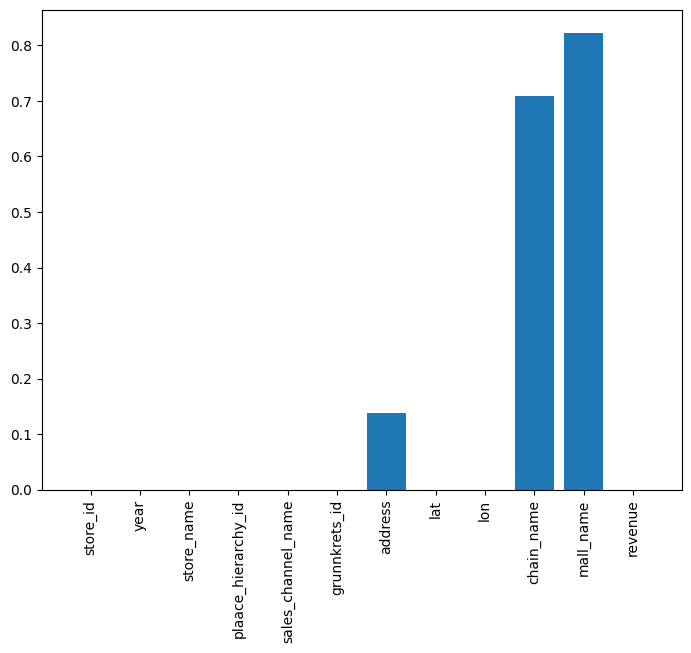

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
horisontal = stores_train.isna().mean().index
vertical = stores_train.isna().mean().values

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()

#Mabye smart to use rows with no NaN values?

In [4]:
sales_channel_names = list(dict.fromkeys(stores_train.sales_channel_name.values))
#print(sales_channel_names)
instances = {i:list(stores_train.sales_channel_name.values).count(i) for i in stores_train.sales_channel_name.values}
#print(instances)
#print(stores_train.revenue)

revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for sales_channel_name in sales_channel_names: #Find revenue for every channel name
    for i in range(len(stores_train.revenue)):
        if stores_train.sales_channel_name.values[i] == sales_channel_name:
            revenue_per_channel_name[sales_channel_name] += stores_train.revenue[i]

#print(revenue_per_channel_name)

mean_revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for key in revenue_per_channel_name.keys(): #Find mean revenue for every channel name
    mean_revenue_per_channel_name[key] = revenue_per_channel_name[key] / instances[key]

#print(mean_revenue_per_channel_name)



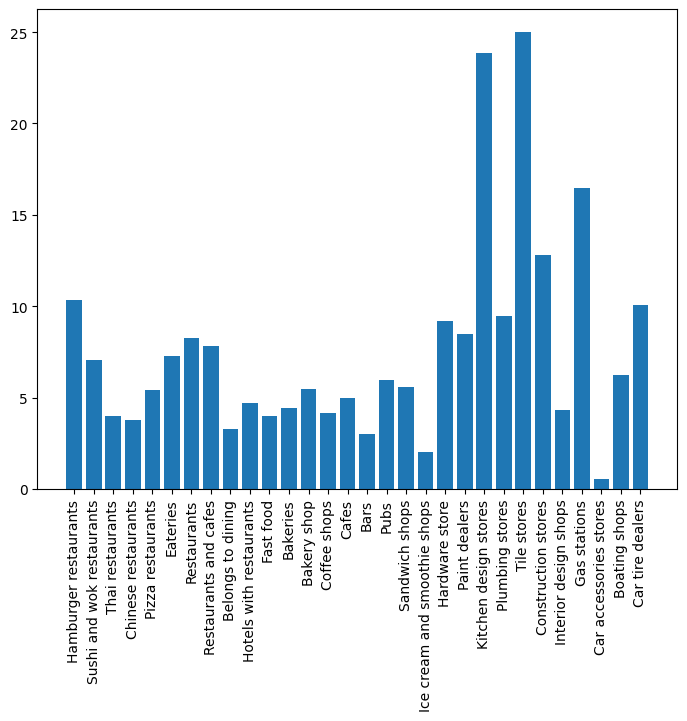

In [5]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

#print(len(list(mean_revenue_per_channel_name.keys())))

vertical = list(mean_revenue_per_channel_name.values())[:30]
horisontal = list(mean_revenue_per_channel_name.keys())[:30]

#print(horisontal)
#print(vertical)

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()

In [6]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
stores_test = pd.read_csv('data/stores_test.csv')

In [8]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)
#print("y_test: ", y_test)

from_channel_to_number_dict = dict.fromkeys(sales_channel_names, 0)
for i in range(len(sales_channel_names)):
    from_channel_to_number_dict[sales_channel_names[i]] = i

print("number of channels: ", len(instances))
print(from_channel_to_number_dict)

sales_channel_name_as_number = []
for i in range(len(sales_channel_names)):
    sales_channel_name_as_number.append(from_channel_to_number_dict[sales_channel_names[i]])

print("sales_channel_name_as_number: ", sales_channel_name_as_number)

translated_to_numbers = []
for i in range(len(stores_train.sales_channel_name.values)):
    translated_to_numbers.append(from_channel_to_number_dict[stores_train.sales_channel_name.values[i]])

translated_to_numbers2 = []
for i in range(len(stores_test.sales_channel_name.values)):
    print(i/len(stores_test.sales_channel_name.values))
    if stores_test.sales_channel_name.values[i] not in sales_channel_names:
        translated_to_numbers2.append(from_channel_to_number_dict["Hamburger restaurants"])
    else:
        translated_to_numbers2.append(from_channel_to_number_dict[stores_test.sales_channel_name.values[i]])

#print("Translated to numbers: ", translated_to_numbers)
#print("Versus what it used to be: ", list(stores_train.revenue.values))

X1_train = np.array(translated_to_numbers).reshape(-1,1)
y1_train = stores_train.revenue.values

X1_test = np.array(translated_to_numbers2).reshape(-1,1)
y1_test = stores_train.revenue.values

#print("y1: ", y1_train, " length: ", len(y1_train))
#print("X1: ", X1_train, "length: ", len(X1_train))

model = LinearRegression()
#model.fit(X_train, y_train)

model.fit(X1_train, y1_train)

predictions1 = model.predict(X1_test)
print("predictions: ", predictions1)

#print("predictions: ", predictions1)

#r squared, coefficient of determination
#print(model.score(X_test, y_test))

#mean squared error
#print(metrics.mean_squared_error(y_test, predictions))

c:\Users\47457\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

number of channels:  91
{'Hamburger restaurants': 0, 'Sushi and wok restaurants': 1, 'Thai restaurants': 2, 'Chinese restaurants': 3, 'Pizza restaurants': 4, 'Eateries': 5, 'Restaurants': 6, 'Restaurants and cafes': 7, 'Belongs to dining': 8, 'Hotels with restaurants': 9, 'Fast food': 10, 'Bakeries': 11, 'Bakery shop': 12, 'Coffee shops': 13, 'Cafes': 14, 'Bars': 15, 'Pubs': 16, 'Sandwich shops': 17, 'Ice cream and smoothie shops': 18, 'Hardware store': 19, 'Paint dealers': 20, 'Kitchen design stores': 21, 'Plumbing stores': 22, 'Tile stores': 23, 'Construction stores': 24, 'Interior design shops': 25, 'Gas stations': 26, 'Car accessories stores': 27, 'Boating shops': 28, 'Car tire dealers': 29, 'Electronics stores': 30, 'Telecom shops': 31, 'Lighting stores': 32, 'Computer stores': 33, 'Multimedia stores': 34, 'Audio and video store': 35, 'Women’s clothing stores': 36, 'Shoe stores': 37, 'Thrift shops - clothing': 38, 'Men’s clothing stores': 39, 'Children’s clothing and equipment sto

In [9]:
submissions = pd.DataFrame()
submissions['id'] = stores_test.store_id.values
submissions['predicted'] = np.asarray(predictions1)

submissions.to_csv('predictions/prediction_linear_regression.csv', index = False)